The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on http://mlg.ulb.ac.be/BruFence and http://mlg.ulb.ac.be/ARTML

Please cite: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cc = pd.read_csv('creditcard.csv')

In [3]:
cc.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
cc.isnull().any().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10edd4590>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11490b950>]], dtype=object)

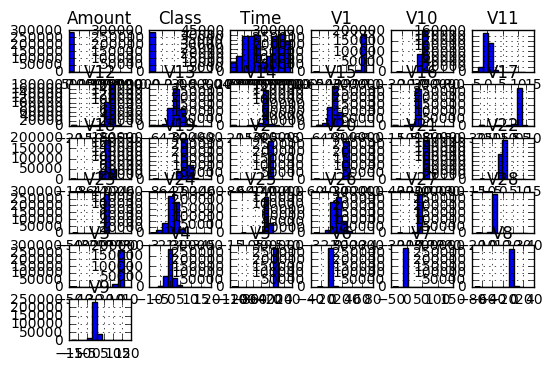

In [5]:
cc.hist()

In [6]:
c = cc['Class'].value_counts()
print c

0    284315
1       492
Name: Class, dtype: int64


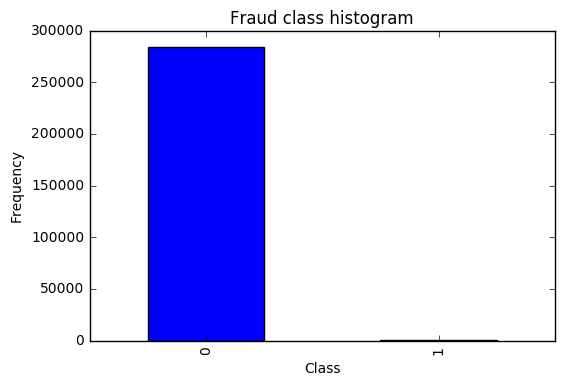

In [7]:
c.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [8]:
cc.pivot_table(
     
    columns='Class',
    values="Amount"
)

Class
0     88.291022
1    122.211321
Name: Amount, dtype: float64

In [9]:
cc.pivot_table(
     
    columns='Time',
    values="Amount"
)

Time
0.0          76.155000
1.0         251.080000
2.0          36.830000
4.0           4.990000
7.0          67.000000
9.0           3.680000
10.0         46.430000
11.0         27.500000
12.0         29.260000
13.0          0.890000
14.0         46.800000
15.0          5.000000
16.0        231.710000
17.0         34.090000
18.0         12.515000
22.0         13.660000
23.0         25.967500
24.0         17.280000
25.0          4.450000
26.0          3.955000
27.0         16.145000
29.0         13.535000
32.0         16.120000
33.0         11.950000
34.0         16.567500
35.0         17.370000
36.0        471.010000
37.0          0.990000
38.0         21.760000
39.0         67.400000
               ...    
172750.0     63.995000
172751.0      1.635000
172754.0      0.770000
172756.0     95.630000
172757.0     14.990000
172758.0     36.510000
172759.0     41.920000
172760.0     19.590000
172761.0      3.570000
172762.0      9.070000
172764.0     40.500000
172766.0     22.666667
172767

The Max time is 172792.0 secs, which is 172792.0/3600, that is 48 hours. So, the data spans only 2 days.

(array([  2.84395000e+05,   3.60000000e+02,   3.60000000e+01,
          1.00000000e+01,   2.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([     0.   ,   2569.116,   5138.232,   7707.348,  10276.464,
         12845.58 ,  15414.696,  17983.812,  20552.928,  23122.044,
         25691.16 ]),
 <a list of 10 Patch objects>)

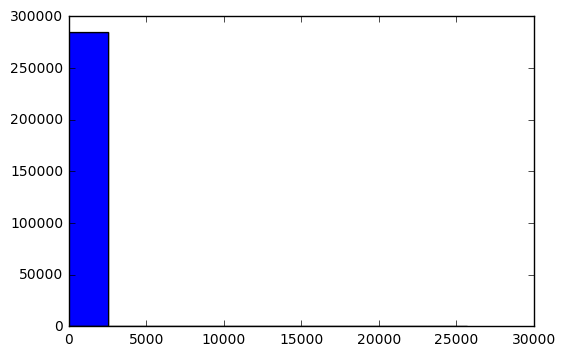

In [10]:
plt.hist(cc['Amount'])

(array([ 10510.,  16955.,  38526.,  38550.,  40243.,  10145.,  17161.,
         38951.,  40779.,  32987.]),
 array([      0. ,   17279.2,   34558.4,   51837.6,   69116.8,   86396. ,
         103675.2,  120954.4,  138233.6,  155512.8,  172792. ]),
 <a list of 10 Patch objects>)

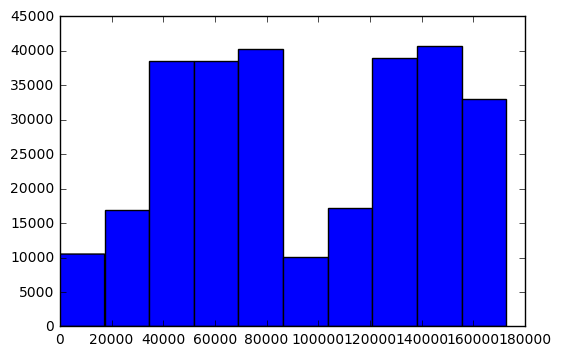

In [11]:
plt.hist(cc['Time'])

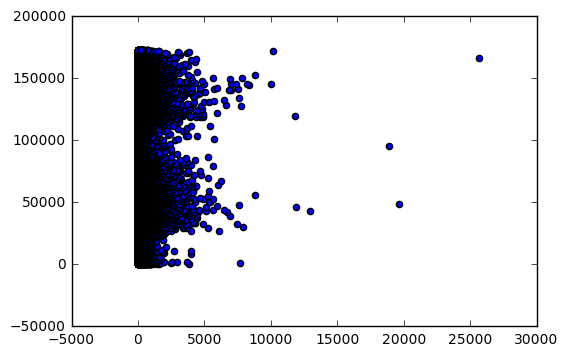

In [12]:
plt.scatter(cc['Amount'], cc['Time'])

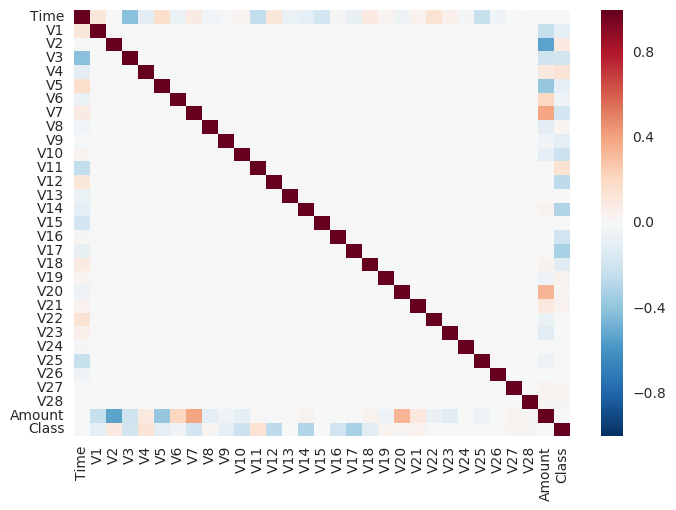

In [13]:
import seaborn as sb
sb.heatmap(cc.corr())

To know whne people use the credit car, it will be convenient to convert time to days, hours and weeks.

In [15]:
# function to convert to datetime
import datetime
def con_time(seconds):
    return datetime.datetime.fromtimestamp(seconds)

t = cc[['Class','Time', 'Amount']].copy()

In [21]:
t['Timestamp'] = t.Time.apply(con_time)
t['Hour'] = t.Timestamp.dt.hour
t_group = t.groupby(['Class','Hour'])['Amount'].count()

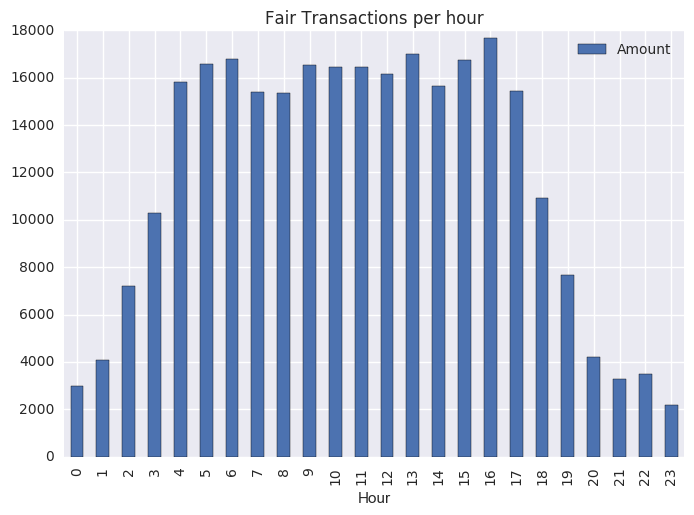

In [23]:
Fair = t_group[0].copy()
Fair.Name = "Transaction Number"
Fair.plot.bar(title = "Fair Transactions per hour", legend = True)

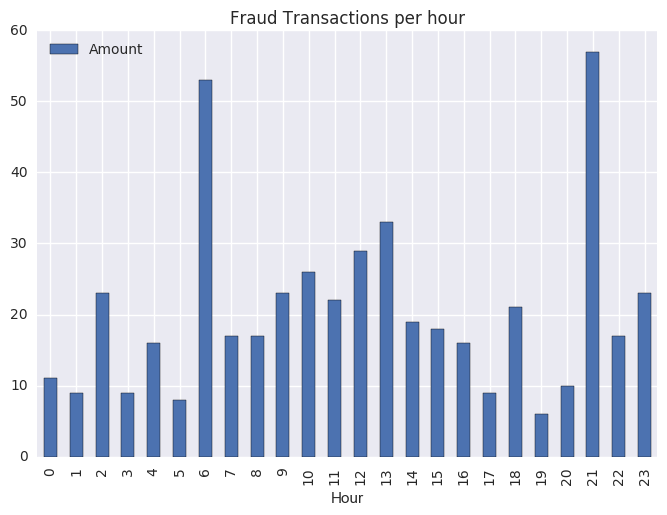

In [25]:
Fraud = t_group[1].copy()
Fraud.Name = "Transaction Number"
Fraud.plot.bar(title = "Fraud Transactions per hour", legend = True)

The legitimate transactions have more or less a normal ditribution. This makes sense, since the general population does not indulge in fraud. There are only a few people doing that, hence the fraud plot is more spread out. It peaks at 6 AM and 9 PM. 1 pm is the next in queue. I wonder what is special about these times. I would have expected peaking between 12 PM and 9 PM

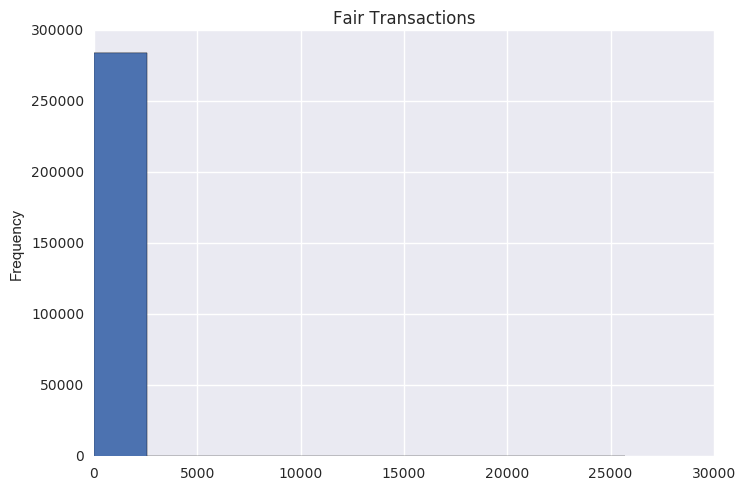

In [27]:
t[t['Class'] == 0].Amount.plot.hist(title = 'Fair Transactions')

The fair transactions range up to around 2500. Here, i decided to introduce an xlimit

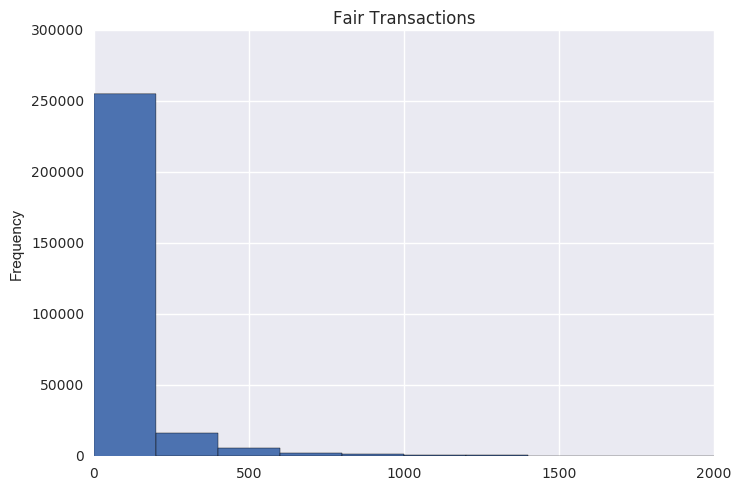

In [32]:
t[(t['Class'] == 0) & (t['Amount'] < 2000)].Amount.plot.hist(title = 'Fair Transactions')

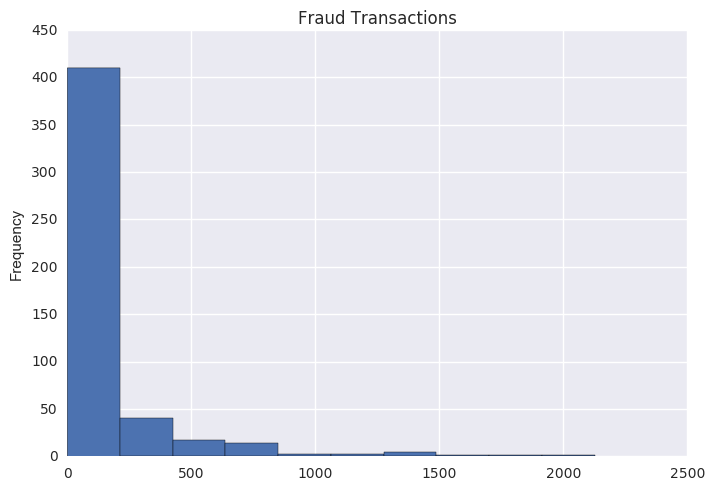

In [34]:
t[t['Class'] == 1]. Amount.plot.hist(title = "Fraud Transactions")

Hypothesis testing to see if Fraud transactions are higher than fair;
H0 : Fraud transactions are of similar or lower value as fair transactions
HA : Fraud transactions are of higher value as fair transactions

In [35]:
#ztest ; fair transactions as population; performing z test 
#on 99% significance level, hence, z score should be >= 2.326
population = t[t.Class == 0].Amount
sample = t[t.Class == 1].Amount
sampleMean = sample.mean()
populationStd = population.std()
populationMean = population.mean()

In [36]:
z_score = (sampleMean - populationMean) / (populationStd / sample.size ** 0.5)
z_score

3.008289898215099

Since the z score is greater than 2.326, we reject the null hypothesis. So there is 99% probability that the amount spent on fraud transactions is higher than fair.

In [ ]:
#Normalize 'Amount' column
#from sklearn.preprocessing import StandardScaler

#cc['AmountN'] = StandardScaler().fit_transform(cc['Amount'].reshape(-1, 1))
#cc = cc.drop(['Time','Amount'],axis=1)
#cc.head()